In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

## Calculate the date 1 year ago from the last data point in the database

## Perform a query to retrieve the data and precipitation scores

## Save the query results as a Pandas DataFrame and set the index to the date column

## Sort the dataframe by date

## Use Pandas Plotting with Matplotlib to plot the data


In [10]:
prcp_each_day = session.query(func.strftime("%Y-%m-%d",Measurement.date), func.sum(Measurement.prcp))\
            .filter(Measurement.date.between('2016-08-01','2017-07-31')).group_by(Measurement.date)\
            .order_by(Measurement.date).all()
prcp_each_day[:10]

[('2016-08-01', 8.71),
 ('2016-08-02', 2.84),
 ('2016-08-03', 0.05),
 ('2016-08-04', 1.81),
 ('2016-08-05', 0.34),
 ('2016-08-06', 0.25),
 ('2016-08-07', 3.34),
 ('2016-08-08', 0.6600000000000001),
 ('2016-08-09', 0.5900000000000001),
 ('2016-08-10', 0.0)]

In [11]:
dates = [i[0] for i in prcp_each_day]
precipitation = [(i[1]) for i in prcp_each_day]
print(dates[:5],'\n', precipitation[:5])

['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05'] 
 [8.71, 2.84, 0.05, 1.81, 0.34]


In [12]:
#putting results into dataframe
prcp_each_day_df = pd.DataFrame(prcp_each_day, columns=['dates', 'precipitation'])

#setting the index to date
prcp_each_day_df.set_index(['dates'], inplace=True)
prcp_each_day_df.head()

,precipitation
dates,
2016-08-01,8.71
2016-08-02,2.84
2016-08-03,0.05
2016-08-04,1.81
2016-08-05,0.34


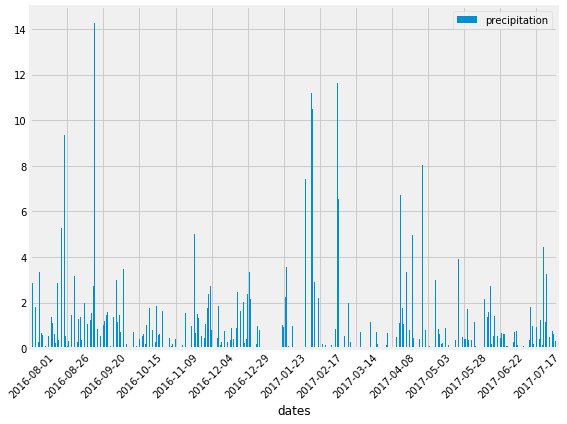

In [13]:
ax = prcp_each_day_df.plot(kind='bar', figsize=(8,6))
n = 25

xticks = ax.xaxis.get_ticklocs()
xticklabels = [tick.get_text() for tick in ax.xaxis.get_ticklabels()]
ax.set_xticks(xticks[::n])
ax.set_xticklabels(xticklabels[::n], rotation=45)
plt.tight_layout()                           
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_each_day_df.describe()


,precipitation
count,365.000000
mean,1.062137
std,1.840263
min,0.000000
25%,0.060000
50%,0.430000
75%,1.210000
max,14.280000


In [17]:
# Design a query to show how many stations are available in this dataset?
Station = Base.classes.station

In [24]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x284f94cd3c8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [25]:
#Query to count the number of stations
total_stations = session.query(func.count(Station.station)).one() #.all() returns list
print('There are total',total_stations[0],'stations')

There are total 9 stations


In [26]:
# Design a query to find the most active stations.
    # List the stations and observation counts in descending order
    # Which station has the highest number of observations?
active_stations = session.query(Measurement.station ,func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
#The most active station
print(f"\nThe most active station is {active_stations[0][0]} with {active_stations[0][1]} observations")


The most active station is USC00519281 with 2772 observations


In [28]:
# Que: Design a query to retrieve the last 12 months of temperature observation data (tobs). 
        # Filter by the station with the highest number of observations.
        # Plot the results as a histogram with bins=12.
    
# Analyst's discretion:
    # Using same 12 month range as above - from August 2016 to July 2017 to retrieve temp obs (tobs)
    # Taking average of tobs as days are repeated 
    
most_active = session.query(Measurement.tobs).\
                    filter(Measurement.station == active_stations[0][0]).\
                    filter(Measurement.date.between('2016-08-01','2017-07-31')).\
                    order_by(Measurement.tobs.desc()).all()
most_active[:10]

[(82.0),
 (82.0),
 (82.0),
 (82.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0),
 (81.0)]

In [23]:
# #unpacking tuple format from most_active list to plot graph
most_active_tobs = [float(i[0]) for i in most_active]
most_active_tobs[:5]

[82.0, 82.0, 82.0, 82.0, 81.0]

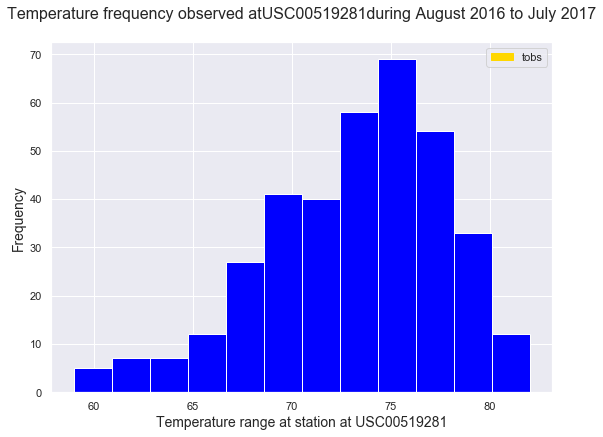

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sns.set()
plt.figure(figsize=(8,6))
plt.hist(most_active_tobs, bins=12, color='blue')
plt.title('Temperature frequency observed at'+ active_stations[0][0] + 'during August 2016 to July 2017\n', fontsize = 16)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Temperature range at station at ' + active_stations[0][0], fontsize = 14)

proxy_tobs = mp.Patch(color='gold', label='tobs')
plt.legend(handles=[proxy_tobs])
plt.show()

In [45]:
sns.set()
plt.figure(figsize=(4,6)) 
plt.bar(len(vaca_tobs), vaca_avg, color='lightcoral', width=0.2, yerr = vaca_max-vaca_min)
plt.xticks([]*0)
plt.yticks(fontsize = 12)
plt.title('Vacation\'s average temperature\n', fontsize=16, color='black')
plt.ylabel('Temp (F)', fontsize = 14,color='black')
# plt.legend('tobs',loc=1)
plt.show()

NameError: name 'vaca_tobs' is not defined

<Figure size 288x432 with 0 Axes>

# Optional

In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vaca_tobs = cal_temps('2017-01-01','2017-01-07') #vacation dates
vaca_avg = vaca_tobs[0]
vaca_max = vaca_tobs[1]
vaca_min = vaca_tobs[2]
len(vaca_tobs)
vaca_tobs

NameError: name 'cal_temps' is not defined

In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
sns.set()
plt.figure(figsize=(4,6)) 
plt.bar(len(vaca_tobs), vaca_avg, color='lightcoral', width=0.2, yerr = vaca_max-vaca_min)
plt.xticks([]*0)
plt.yticks(fontsize = 12)
plt.title('Vacation\'s average temperature\n', fontsize=16, color='black')
plt.ylabel('Temp (F)', fontsize = 14,color='black')
# plt.legend('tobs',loc=1)
plt.show()

NameError: name 'vaca_tobs' is not defined

<Figure size 288x432 with 0 Axes>

In [48]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [49]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [50]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [51]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [52]:
# Plot the daily normals as an area plot with `stacked=False`
